# **Statistics** Domestic violence against women

The dataset used:
[*Domestic violence.csv*](https://www.kaggle.com/datasets/fahmidachowdhury/domestic-violence-against-women/data)



This dataset contains information on domestic violence against women in a specific rural area of a developing country. The data are collected to help understand the link between various socioeconomic factors and domestic violence.




* EN. No: Serial number of the record.
* Age: Age of the respondent.
* Education: educational attainment of the respondent(tertiary for higher secondary).
* Employment: Employment status of the respondent.
* Income: Income of the respondent: income level of the respondent (0 means no income).
* Marital status: Marital status of the respondent (married or single).
* Violence: indicates whether the respondent has experienced domestic violence (yes or no).

The **goal** is to compare the results and identify the conditions under which the likelihood of domestic violence is highest and lowest. Factors examined include age, education, employment, marital status and income.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats

In [ ]:
# Load the dataset
df = pd.read_csv("Domestic violence.csv")

# Age distribution of women experiencing domestic violence.

In [1]:
# Data type checking and possible conversion of Age column to numeric type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Remove rows with incorrect data (NaN)
df = df.dropna(subset=['Age'])

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

NameError: name 'pd' is not defined

In [66]:
# Výpočet popisných statistik
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]
std_age = df['Age'].std()

print(f"Průměrný věk: {mean_age:.2f}")
print(f"Medián věku: {median_age}")
print(f"Mode Age: {mode_age}")
print(f"Směrodatná odchylka věku: {std_age:.2f}")

Průměrný věk: 31.38
Medián věku: 30.0
Mode Age: 30
Směrodatná odchylka věku: 9.60


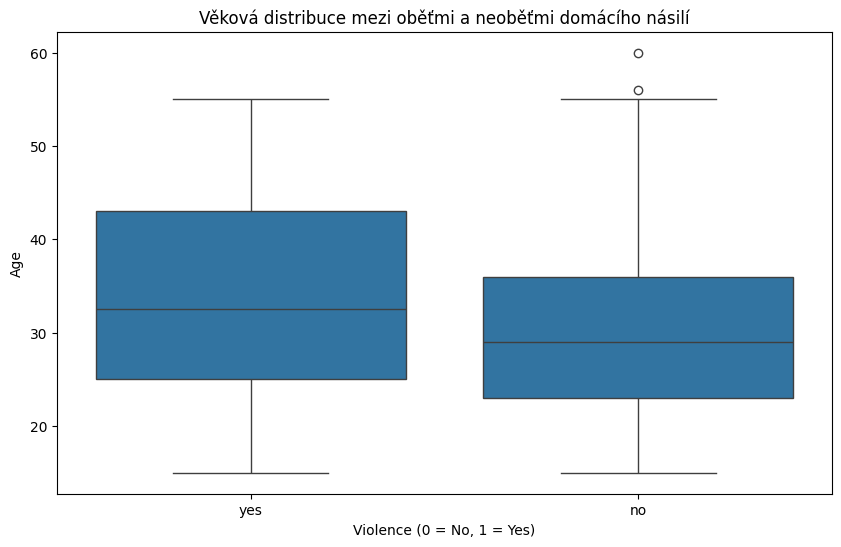

In [ ]:
# Remove unnecessary spaces in an entry
df = df.rename(columns={'Violence ': 'Violence'})

# Creating a boxplot for age analysis in different groups (victims and non-victims)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Violence', y='Age', data=df)
plt.title('Age distribution between victims and non-victims of domestic violence')
plt.xlabel('Violence (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Relationship between educational attainment and violence

In [2]:
# Remove unnecessary spaces in an entry
df = df.rename(columns={'Education ': 'Education'})

# Create a bar chart that shows the proportion of women in each education category.
plt.figure(figsize=(10,6))
sns.histplot(df['Education'])
plt.title('Degree of education',size=14)
plt.show()

NameError: name 'df' is not defined

This is a histogram that shows the distribution of women's education levels in the dataset. It allows you to see how many women have a certain level of education.

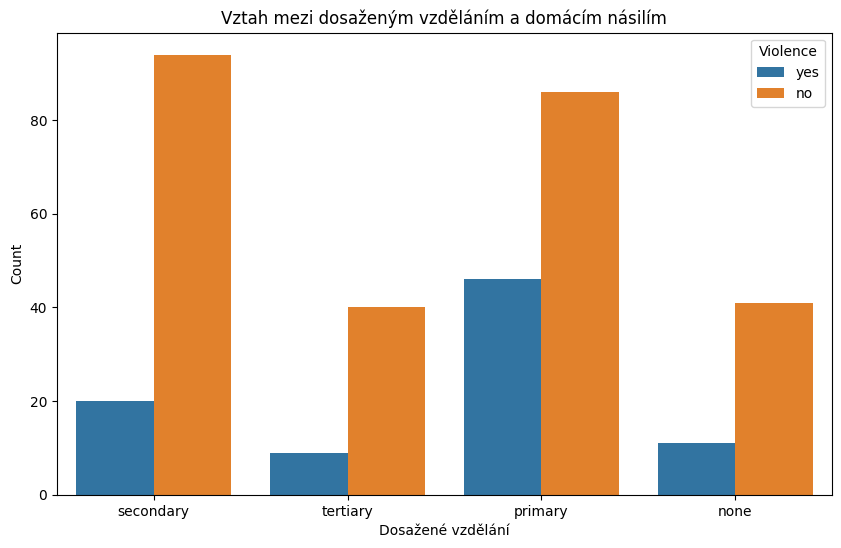

In [ ]:
# Relationship between educational attainment and domestic violence
plt.figure(figsize=(10,6))
sns.countplot(x='Education', hue='Violence', data=df)
plt.title("Relationship between educational attainment and domestic violence")
plt.xlabel("Educational attainment")
plt.ylabel("Count")
plt.show()

A graph showing the distribution of educational attainment among women divided into two groups: those who have experienced domestic violence and those who have not. This graph allows us to understand whether there is a relationship between education level and the likelihood of being a victim of domestic violence.

# Employment status and domestic violence

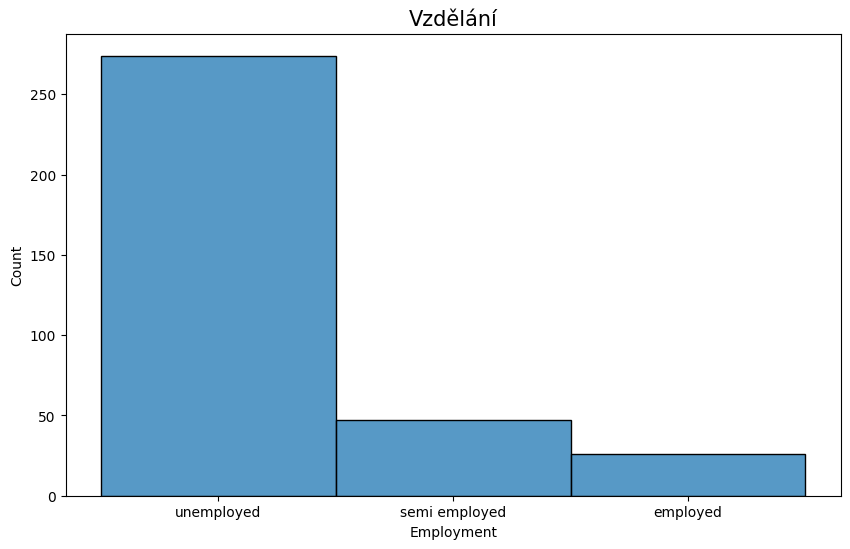

In [ ]:
# Remove unnecessary spaces in an entry
df = df.rename(columns={'Employment ': 'Employment'})

# Remove unnecessary spaces in an entry
df['Employment'] = df['Employment'].replace('employed ', 'employed')

# Create a bar chart to show the share of women in each occupational category
plt.figure(figsize=(10,6))
sns.histplot(df['Employment'])
plt.title('Education', size=15)
plt.show()

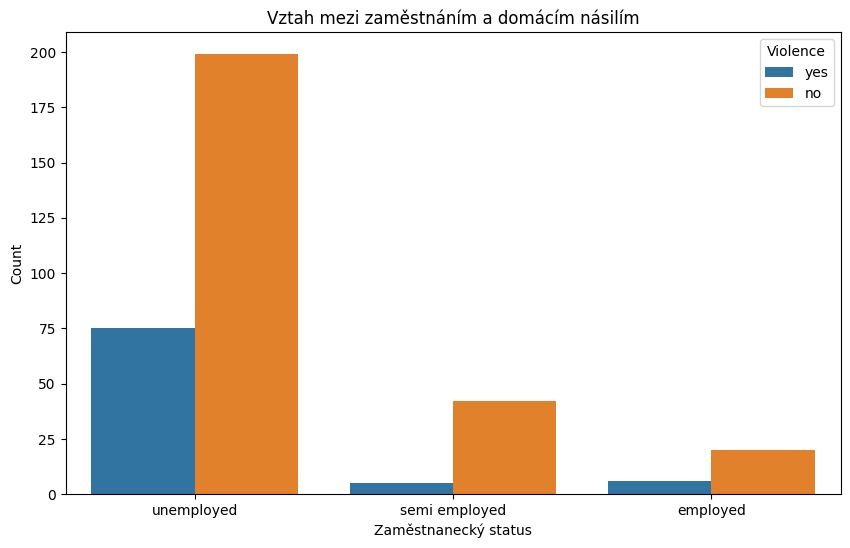

In [ ]:
# Relationship between employment and domestic violence
plt.figure(figsize=(10,6))
sns.countplot(x='Employment', hue='Violence', data=df)
plt.title("Vztah mezi zaměstnáním a domácím násilím")
plt.xlabel("Employment status")
plt.ylabel("Count")
plt.show()

This bar chart shows the proportion of women in each occupational category. It helps to understand the employment of women in the dataset, which can be useful for further analysis and decision-making.

**Hypothesis formulation:**

*Null hypothesis (H0):* Employment status does not affect the likelihood of domestic violence.

*Alternative hypothesis (H1):* Employment status affects the likelihood of domestic violence.

In [ ]:
# Remove unnecessary spaces in an entry
df = df.rename(columns={'Employment ': 'Employment'})

df['Employment'] = df['Employment'].replace('employed ', 'employed')

df['Employment'] = df['Employment'].replace({'employed': 2, 'semi employed': 1, 'unemployed': 0})
df['Violence'] = df['Violence'].replace({'yes': 1, 'no': 0})

# Dependent variable (Y) - domestic violence
Y = df['Violence']

# The independent variable (X) is the income
X = sm.add_constant(df['Employment'])

# Building a logistic regression model
model = sm.Logit(Y, X).fit()

# Output of model results
print(model.summary())

# Get p-value
p_value = model.pvalues['Employment']
print(f"P-value for the variable 'Employment status': {p_value}")

# Hypothesis testing at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Rejection of the null hypothesis: employment status affects the likelihood of domestic violence.")
else:
    print("We cannot reject the null hypothesis: Employment status does not affect the likelihood of domestic violence.")

Optimization terminated successfully.
         Current function value: 0.556083
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Violence   No. Observations:                  347
Model:                          Logit   Df Residuals:                      345
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                0.006903
Time:                        15:33:42   Log-Likelihood:                -192.96
converged:                       True   LL-Null:                       -194.30
Covariance Type:            nonrobust   LLR p-value:                    0.1015
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0164      0.135     -7.514      0.000      -1.282      -0.751
Employment    -0.3727      0.

# Relationship between a woman's income and the likelihood of experiencing domestic violence

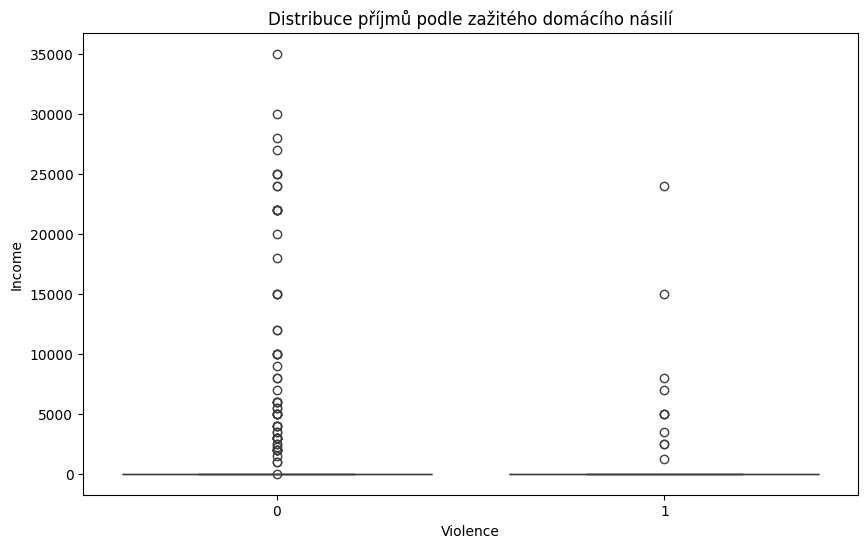

In [ ]:
# Relationship between income and domestic violence
plt.figure(figsize=(10,6))
sns.boxplot(x='Violence', y='Income', data=df)
plt.title('Income distribution by experience of domestic violence')
plt.show()

# Marital status

<Figure size 1000x600 with 0 Axes>

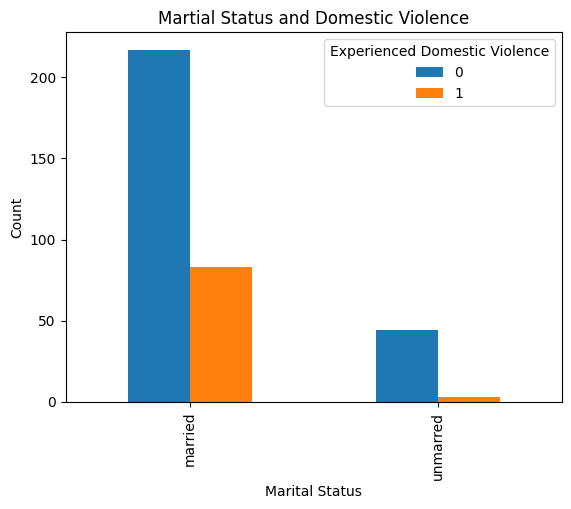

In [ ]:
# Remove unnecessary spaces in an entry
df = df.rename(columns={'Marital status ': 'Marital status'})

plt.figure(figsize=(10,6))
pd.crosstab(df['Marital status'], df['Violence']).plot(kind='bar')
plt.title("Martial Status and Domestic Violence")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title='Experienced Domestic Violence')
plt.show()

**Hypothesis formulation:**

*Null hypothesis (H0)*: Marital status does not affect the likelihood of domestic violence.


*Alternative Hypothesis (H1)*: Marital status affects the likelihood of domestic violence.

In [ ]:
# Data retrieval and pre-processing
df['Marital status'] = df['Marital status'].replace({'married': 1, 'unmarred': 0})

df['Violence'] = pd.to_numeric(df['Violence'], errors='coerce')

# Remove rows with incorrect data (NaN)
df = df.dropna(subset=['Marital status', 'Violence'])

# Dependent variable (Y) - domestic violence
Y = df['Violence']

# The independent variable (X) is the income
X = sm.add_constant(df['Marital status'])

# Building a logistic regression model
model = sm.Logit(Y, X).fit()

# Output of model results
print(model.summary())

# Get p-value
p_value = model.pvalues['Marital status']
print(f"P-hodnota pro proměnnou Rodinný stav: {p_value}")

# Hypothesis testing at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Rejection of the null hypothesis: marital status affects the likelihood of domestic violence.")
else:
    print("We cannot reject the null hypothesis: marital status does not affect the likelihood of domestic violence.")

Optimization terminated successfully.
         Current function value: 0.542046
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Violence   No. Observations:                  347
Model:                          Logit   Df Residuals:                      345
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                 0.03197
Time:                        15:33:43   Log-Likelihood:                -188.09
converged:                       True   LL-Null:                       -194.30
Covariance Type:            nonrobust   LLR p-value:                 0.0004239
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.6856      0.597     -4.501      0.000      -3.855      -1.516
Marital status   

# Correlation analysis

In [ ]:
# Suppose 'Education' has levels 'none', 'primary', 'secondary', 'tertiary'.
# Convert education levels to dummy variables
df['Education'] = df['Education'].replace({'none': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3})

# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                  SL. No       Age  Education  Employment    Income  \
SL. No          1.000000 -0.033848   0.138137    0.662141  0.554103   
Age            -0.033848  1.000000  -0.358121    0.021902  0.055338   
Education       0.138137 -0.358121   1.000000    0.262371  0.317579   
Employment      0.662141  0.021902   0.262371    1.000000  0.829177   
Income          0.554103  0.055338   0.317579    0.829177  1.000000   
Marital status  0.024969  0.399550  -0.335689   -0.022524  0.026729   
Violence       -0.173980  0.166583  -0.092675   -0.084570 -0.119666   

                Marital status  Violence  
SL. No                0.024969 -0.173980  
Age                   0.399550  0.166583  
Education            -0.335689 -0.092675  
Employment           -0.022524 -0.084570  
Income                0.026729 -0.119666  
Marital status        1.000000  0.168689  
Violence              0.168689  1.000000  


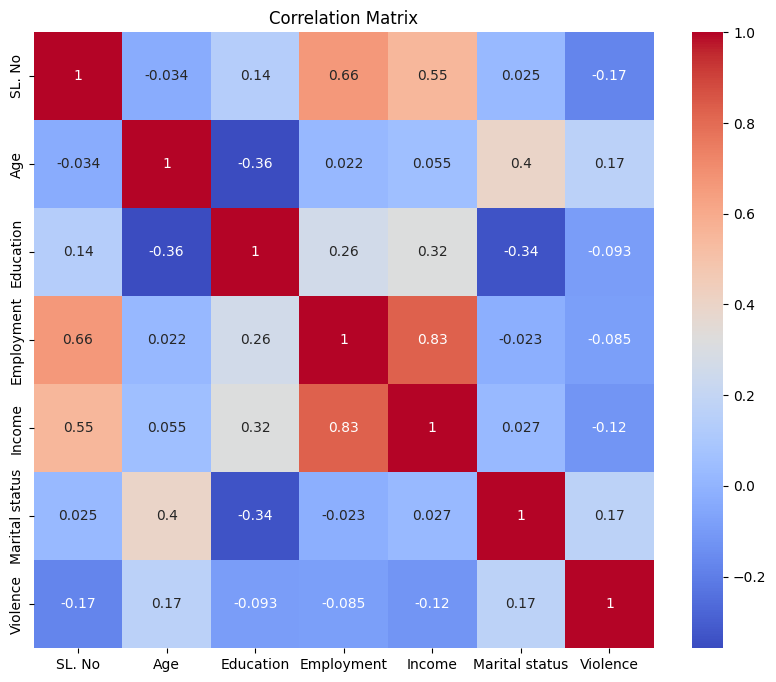

In [77]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



1. **Age**:


* ***Age and education*** (-0.358): Slight negative correlation. This means that the level of education tends to decrease with increasing age. This may be due to the fact that older generations may have less formal education.
* ***Age and marital status*** (0.400): Slight positive correlation. Older people are more likely to be married, which is logical.
* ***Age and violence*** (0.167): weak positive correlation. This may indicate that the likelihood of being a victim of domestic violence increases slightly with age.







2.   **Education**

* ***Education and employment*** (0.262): weak positive correlation. People with higher education are more likely to be employed.
* ***Education and income*** (0.318): Slight positive correlation. People with higher levels of education tend to earn more. This is in line with expectations and supports the idea that education contributes to income.
* ***Education and marital status*** (-0.336): Slight negative correlation. This may indicate that people with higher levels of education are less likely to be married or married.



3.   **Employment**



* ***Employment and income*** (0.829): strong positive correlation. This correlation indicates that employment has a significant effect on income. This makes sense - employed people earn more.
* ***Employment and violence*** (-0.085): Very weak negative correlation. The relationship between employment and the likelihood of domestic violence is weak and insignificant according to this coefficient.



4.   **Income**


* ***Income and violence*** (-0.120): weak negative correlation. This suggests a tendency for the likelihood of domestic violence to decrease as income increases, but this effect is very weak.



5.   **Marital status**


* ***Marital status and violence*** (0.169): weak positive correlation. This may mean that married persons are slightly more likely to experience domestic violence, but the correlation is weak.

# Analysis of the combined effects of factors

## Relationship between education and income and incidence of violence

**Analysis of the effect of education on income:**

**Hypothesis formulation:**

*Null hypothesis (H0)*: Education level affects income.


*Alternative hypothesis (H1)*: Education level does not affect income.

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     38.70
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           1.43e-09
Time:                        15:33:43   Log-Likelihood:                -3477.0
No. Observations:                 347   AIC:                             6958.
Df Residuals:                     345   BIC:                             6966.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -809.1760    553.19

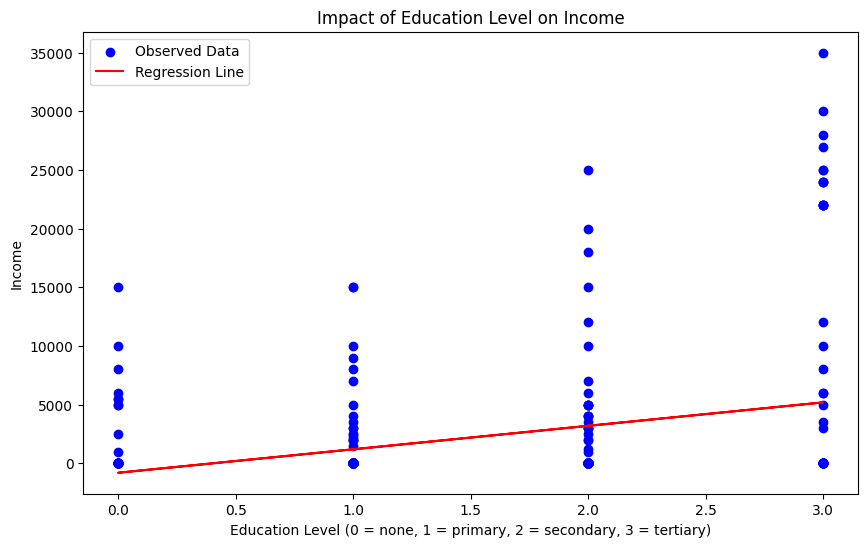

P-value для переменной Education_numeric: 1.431733949657788e-09
Zamítáme nulovou hypotézu: vzdělání ovlivňuje příjem.


In [ ]:
# Suppose 'Education' has levels 'none', 'primary', 'secondary', 'tertiary'.
# Convert education levels to dummy variables
df['Education_numeric'] = df['Education'].replace({'none': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3})

# Remove rows with incorrect data (NaN)
df = df.dropna(subset=['Education_numeric', 'Income'])

# Dependent variable (Y) - income
Y = df['Income']

# The independent variable (X) is the level of education
X = sm.add_constant(df['Education_numeric'])

# Building a linear regression model
model = sm.OLS(Y, X).fit()

# Output of model results
print(model.summary())

# Visualization of the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Education_numeric'], df['Income'], color='blue', label='Observed Data')
plt.plot(df['Education_numeric'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Education Level (0 = none, 1 = primary, 2 = secondary, 3 = tertiary)')
plt.ylabel('Income')
plt.title('Impact of Education Level on Income')
plt.legend()
plt.show()

# Getting p-value for variable Education_numeric
p_value = model.pvalues['Education_numeric']
print(f"P-value для переменной Education_numeric: {p_value}")

# Hypothesis testing at 0.05 level of significance
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: education affects income.")
else:
    print("We cannot reject the null hypothesis: education has no effect on income.")

Women with higher education generally have higher incomes.

**Analysis of the relationship between income and domestic violence:**

<ipython-input-79-a4019cc183ad>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


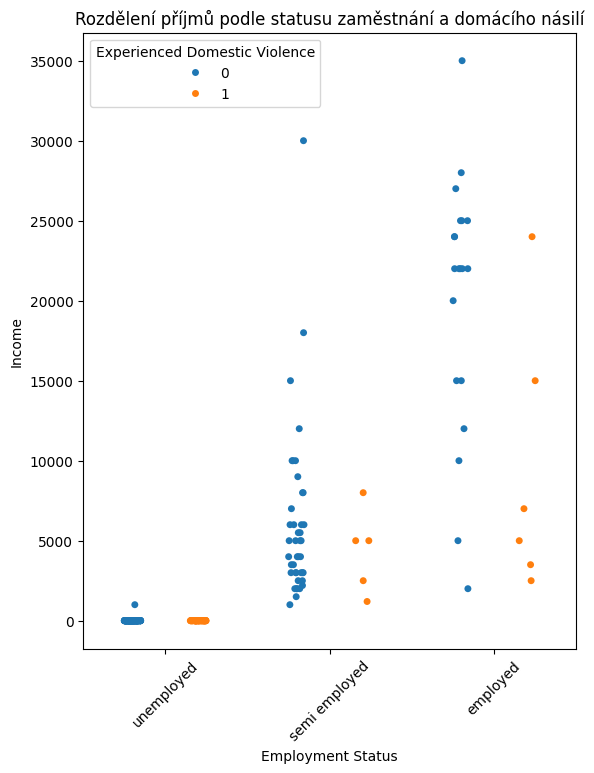

In [ ]:
df['Marital status'] = df['Marital status'].replace({1: 'married', 0: 'unmarried'})
df['Employment'] = df['Employment'].replace({2: 'employed', 1: 'semi employed', 0: 'unemployed'})

fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Employment status chart
ax2 = plt.subplot(gs[1])
sns.stripplot(x='Employment', y='Income', hue='Violence', data=df, jitter=True, dodge=True, size=5, ax=ax2)
ax2.set_title('Income distribution by employment status and domestic violence')
ax2.set_xlabel('Employment Status')
ax2.set_ylabel('Income')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.legend(title='Experienced Domestic Violence')

plt.show()

**Hypothesis formulation:**

*Null hypothesis (H0)*: Income does not affect the probability of domestic violence (i.e. income and violence are independent).


*Alternative Hypothesis (H1)*: Income level affects the likelihood of domestic violence (i.e., income and violence are dependent).

In [ ]:
# Data retrieval and pre-processing
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Violence'] = df['Violence'].replace({'yes': 1, 'no': 0})

# Remove rows with incorrect data (NaN)
df = df.dropna(subset=['Income', 'Violence'])


# Dependent variable (Y) - domestic violence
Y = df['Violence']

# The independent variable (X) is the income
X = sm.add_constant(df['Income'])

# Building a logistic regression model
model = sm.Logit(Y, X).fit()

# Output of model results
print(model.summary())

# Get p-value
p_value = model.pvalues['Income']
print(f"P-hodnota pro proměnnou „Příjem“: {p_value}")

# Hypothesis testing at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Rejection of the null hypothesis: income level affects the likelihood of domestic violence.")
else:
    print("We cannot reject the null hypothesis: Income level has no effect on the probability of domestic violence.")

Optimization terminated successfully.
         Current function value: 0.550808
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Violence   No. Observations:                  347
Model:                          Logit   Df Residuals:                      345
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                 0.01632
Time:                        15:33:45   Log-Likelihood:                -191.13
converged:                       True   LL-Null:                       -194.30
Covariance Type:            nonrobust   LLR p-value:                   0.01178
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9970      0.131     -7.625      0.000      -1.253      -0.741
Income     -7.373e-05   3.56e

## Impact of marital status and income on domestic violence

**Income dependence on marital status**

In [ ]:
# Conversion of marital status to dummy variables
df['Marital status_numeric'] = df['Marital status'].replace({'married': 1, 'unmarried': 0})

# The dependent variable (Y) is income
Y = df['Income']

# The independent variable (X) is marital status
X = sm.add_constant(df['Marital status_numeric'])

# Building a linear regression model
model_income = sm.OLS(Y, X).fit()

# Output of model results
print(model_income.summary())

# Testing the hypothesis of the importance of marital status
p_value_income = model_income.pvalues['Marital status_numeric']
alpha = 0.05
if p_value_income < alpha:
    print("Importance of marital status: marital status affects income.")
else:
    print("Marital status has no significant effect on income.")

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2467
Date:                Thu, 29 Aug 2024   Prob (F-statistic):              0.620
Time:                        15:33:45   Log-Likelihood:                -3495.3
No. Observations:                 347   AIC:                             6995.
Df Residuals:                     345   BIC:                             7002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1723

**Probability of violence by income and marital status**

<ipython-input-82-3767a55ea4cf>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


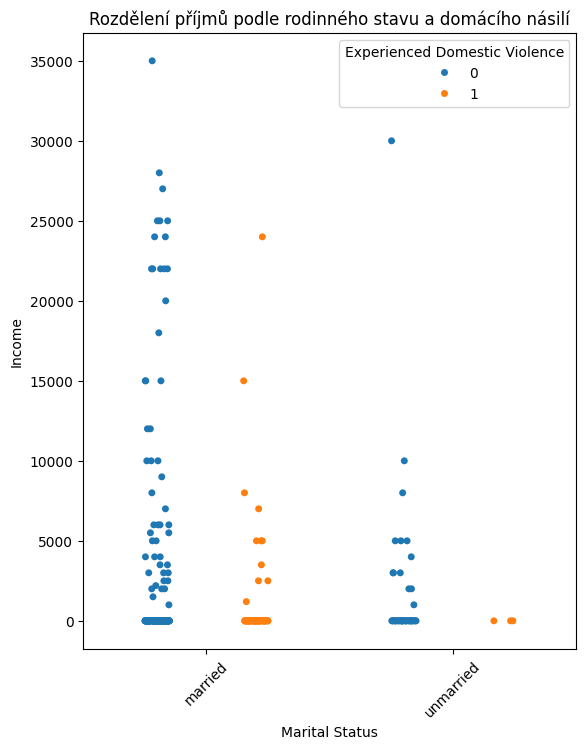

In [ ]:
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Marital status chart
ax1 = plt.subplot(gs[0])
sns.stripplot(x='Marital status', y='Income', hue='Violence', data=df, jitter=True, dodge=True, size=5, ax=ax1)
ax1.set_title('Income distribution by marital status and domestic violence')
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Income')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.legend(title='Experienced Domestic Violence')

plt.show()

In [ ]:
# Dependent variable (Y) - domestic violence
Y_violence = df['Violence'].replace({'yes': 1, 'no': 0})

# Independent variables (X) - marital status and income
X = df[['Income', 'Marital status_numeric']]
X = sm.add_constant(X)

# Building a logistic regression model
model_violence = sm.Logit(Y_violence, X).fit()

# Output of model results
print(model_violence.summary())

# Testing the hypothesis of the effect of income and marital status on the likelihood of violence
p_values_violence = model_violence.pvalues
print(f"P-values for the variables:\n{p_values_violence}")

# Checking the significance of each variable
if p_values_violence['Income'] < alpha:
    print("Income has a significant effect on the likelihood of domestic violence.")
else:
    print("Income has no significant effect on the likelihood of domestic violence.")

if p_values_violence['Marital status_numeric'] < alpha:
    print("Marital status has a significant impact on the likelihood of domestic violence.")
else:
    print("Marital status has no significant effect on the likelihood of domestic violence.")

Optimization terminated successfully.
         Current function value: 0.532358
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Violence   No. Observations:                  347
Model:                          Logit   Df Residuals:                      344
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                 0.04927
Time:                        15:36:05   Log-Likelihood:                -184.73
converged:                       True   LL-Null:                       -194.30
Covariance Type:            nonrobust   LLR p-value:                 6.954e-05
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.5937      0.598     -4.335      0.000      -3.766      